In [43]:
# Import tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# We will use the mnist data set to implement multiclass classification
mnist = tf.keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test) = mnist.load_data()

X_valid,X_train = X_train_full[:5000]/255 , X_train_full[5000:]/255 # 5000 for validation, 55000 for training
y_valid,y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test/255
print(f"X train shape:{X_train.shape}")

X train shape:(55000, 28, 28)


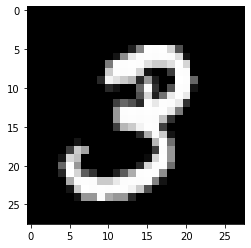

In [27]:
# Look at some images
plt.imshow(X_train[1],cmap = 'gray')
plt.show()

In [28]:
# Build the model

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)), # Convert 2D features (pixels, 28 X 28) to 1D with 784 values
                                    tf.keras.layers.Dense(128,activation = 'relu'), # Dense layers do a linear transformation; activation here is ReLu
                                    ##### RELU: Rectified Linear Unit, non linear transformation of the activation;
                                    ##### returns 0 if the activation is negative (shuts down neurons) and the actual number if the activation is positive
                                    ##### interesting because it does not activate all neurons
                                    tf.keras.layers.Dropout(0.2), # Regularization layer; we don't want the network to depend on one single input strongly
                                    ### Dropout randomly drops input nodes to 0 and won't transmit their output
                                    ### This helps the network to learn evenly
                                    tf.keras.layers.Dense(10, activation = 'softmax') # Final layer; 10 number of classes
                                    ### Softmax: THE activation function used for multiclass classification


])

In [29]:
# Compile the model

model.compile(optimizer = 'adam', # we can use others like sgd
              loss = 'sparse_categorical_crossentropy', # Used for multiclass classification vs binary crossentropy for binary classification
              metrics = ['accuracy'])

In [30]:
# Train the model
r = model.fit(X_train,y_train,validation_data=(X_valid,y_valid), epochs = 10)

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3108 - accuracy: 0.9101 - val_loss: 0.1465 - val_accuracy: 0.9582
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1475 - accuracy: 0.9565 - val_loss: 0.1023 - val_accuracy: 0.9676
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1108 - accuracy: 0.9661 - val_loss: 0.0826 - val_accuracy: 0.9764
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0887 - accuracy: 0.9726 - val_loss: 0.0721 - val_accuracy: 0.9804
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0762 - accuracy: 0.9757 - val_loss: 0.0782 - val_accuracy: 0.9782
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0666 - accuracy: 0.9786 - val_loss: 0.0697 - val_accuracy: 0.9812
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0583 - accuracy: 0.9809 - val_loss: 0.0674 - val_accuracy:

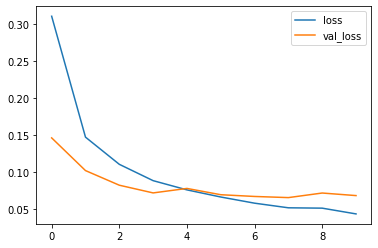

In [31]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()

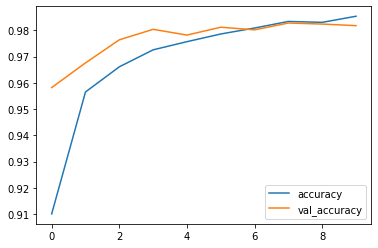

In [32]:
# Plot accuracy per iteration

plt.plot(r.history['accuracy'],label = 'accuracy')
plt.plot(r.history['val_accuracy'],label = 'val_accuracy')
plt.legend()
plt.show()

In [33]:
# Evaluate the model
print(model.evaluate(X_test,y_test)) # Print accuracy and loss for the validation set of last epoch

313/313 [==============================] - 1s 2ms/step - loss: 0.0712 - accuracy: 0.9798
[0.07120515406131744, 0.9797999858856201]


In [34]:
# Make some predictions
X_new = X_test [:5]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.01]],
      dtype=float32)

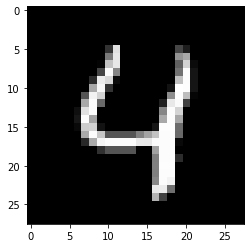

In [46]:
i = 4
plt.imshow(X_test[i],cmap = 'gray')
plt.show()
